In [42]:
import cv2
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [186]:
input_dir = 'dataset/AddTest'
output_dir = 'dataset/AddOutput'
groundtruth_dir = 'dataset/AddTestGT'

In [116]:
input_dir = 'dataset/test'
output_dir = 'dataset/output'
groundtruth_dir = 'dataset/groundtruth'

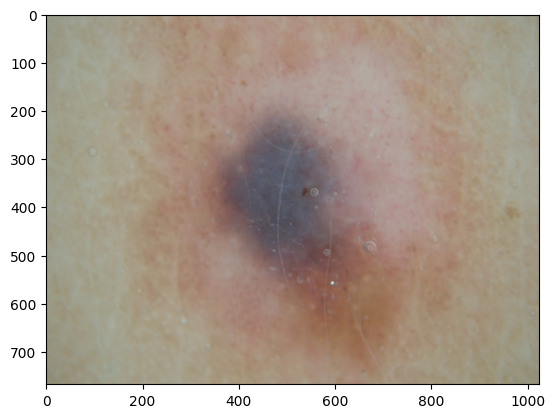

In [325]:
image_no = '044'
img = cv2.imread(input_dir + f'/SLA_{image_no}.jpg')
img_ground = cv2.imread(groundtruth_dir + f'/SLA_GT_{image_no}.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # convert BGR to RGB
plt.imshow(img_rgb)
plt.show()

In [326]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Reduce noise using Gaussian Blur
blur = cv2.GaussianBlur(gray_img,(7,7),0)
# Increase contrast and brightness
scaled_img = cv2.convertScaleAbs(blur, alpha=1.2, beta=5)

# Otsu's Binarization 
ret,binary = cv2.threshold(scaled_img,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
cross_kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))
eroded = cv2.erode(binary,cross_kernel,iterations = 5)

thresh = eroded.copy()

h, w = img.shape[:2]
if thresh[0, 0] == 255:
    cv2.floodFill(thresh, None, (0, 0), 0)
if thresh[0, w-1] == 255:
    cv2.floodFill(thresh, None, (w-1, 0), 0)


dilated = cv2.dilate(thresh,cross_kernel,iterations = 10)

# Find largest contour
contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
largest_cnt = max(contours, key=cv2.contourArea)

# Draw the contours
largest_mask = np.zeros(dilated.shape, np.uint8)
cv2.drawContours(largest_mask, [largest_cnt], -1, 255, cv2.FILLED)
lesion_segment = cv2.bitwise_and(dilated, largest_mask)

ellipse_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
dilation = cv2.dilate(lesion_segment,ellipse_kernel,iterations = 5)

# Flood fill background to find inner holes
holes = dilation.copy()
cv2.floodFill(holes, None, (0, 0), 255)

# Invert holes, bitwise or with thresh to fill in holes
holes = cv2.bitwise_not(holes)
filled_mask = cv2.bitwise_or(dilation, holes)

outImg = np.round(np.divide(filled_mask.copy(),255))

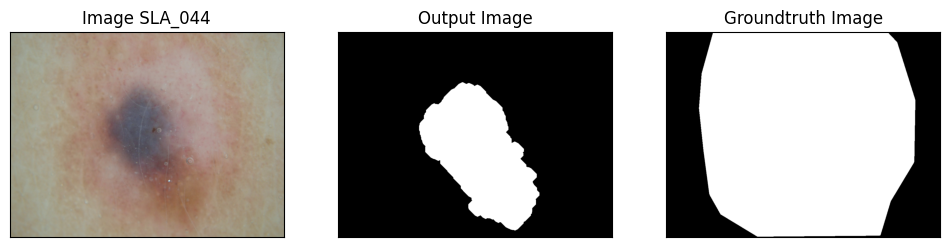

In [327]:
plt.figure(figsize=(12,5))
plt.subplot(131), plt.imshow(img_rgb,cmap='gray')
plt.title('Image SLA_'+image_no)
plt.xticks([]),plt.yticks([])

plt.subplot(132), plt.imshow(outImg,cmap='gray')
plt.title('Output Image')
plt.xticks([]),plt.yticks([])

plt.subplot(133), plt.imshow(img_ground,cmap='gray')
plt.title('Groundtruth Image')
plt.xticks([]),plt.yticks([])
plt.show()

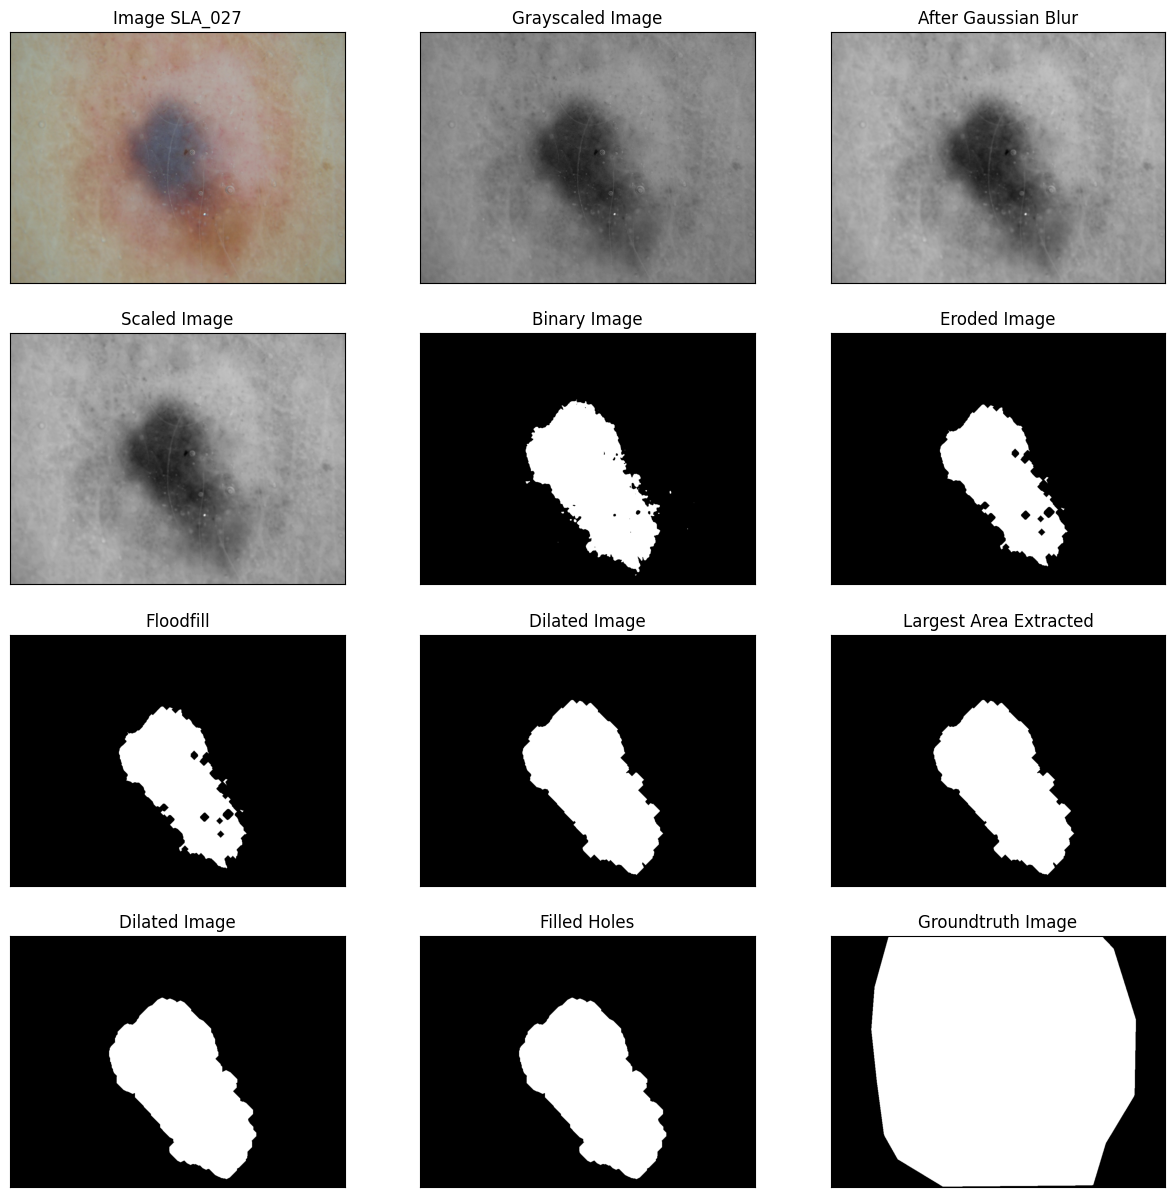

In [328]:
plt.figure(figsize=(15,15))
plt.subplot(431), plt.imshow(img_rgb,cmap='gray')
plt.title('Image SLA_027')
plt.xticks([]),plt.yticks([])

plt.subplot(432), plt.imshow(gray_img,cmap='gray')
plt.title('Grayscaled Image')
plt.xticks([]),plt.yticks([])

plt.subplot(433), plt.imshow(blur,cmap='gray')
plt.title('After Gaussian Blur')
plt.xticks([]),plt.yticks([])

plt.subplot(434), plt.imshow(scaled_img,cmap='gray')
plt.title('Scaled Image')
plt.xticks([]),plt.yticks([])

plt.subplot(435), plt.imshow(binary,cmap='gray')
plt.title('Binary Image')
plt.xticks([]),plt.yticks([])

plt.subplot(436), plt.imshow(eroded,cmap='gray')
plt.title('Eroded Image')
plt.xticks([]),plt.yticks([])

plt.subplot(437), plt.imshow(thresh,cmap='gray')
plt.title('Floodfill')
plt.xticks([]),plt.yticks([])

plt.subplot(4,3,8), plt.imshow(dilated,cmap='gray')
plt.title('Dilated Image')
plt.xticks([]),plt.yticks([])

plt.subplot(4,3,9), plt.imshow(lesion_segment,cmap='gray')
plt.title('Largest Area Extracted')
plt.xticks([]),plt.yticks([])

plt.subplot(4,3,10), plt.imshow(dilation,cmap='gray')
plt.title('Dilated Image')
plt.xticks([]),plt.yticks([])

plt.subplot(4,3,11), plt.imshow(filled_mask,cmap='gray')
plt.title('Filled Holes')
plt.xticks([]),plt.yticks([])

plt.subplot(4,3,12), plt.imshow(img_ground,cmap='gray')
plt.title('Groundtruth Image')
plt.xticks([]),plt.yticks([])
plt.show()


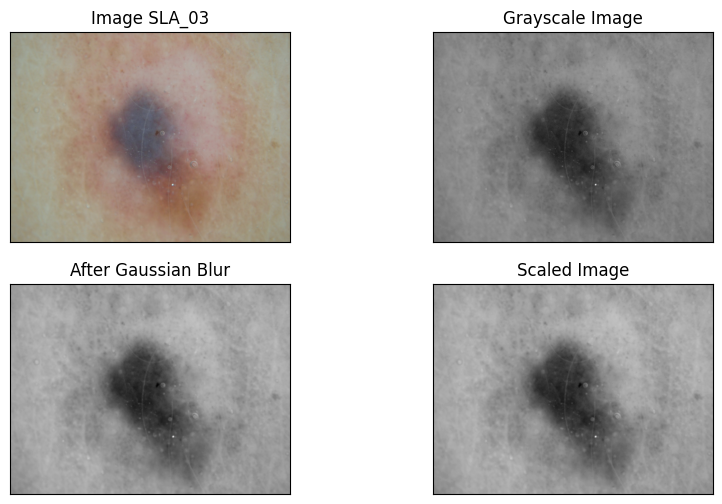

In [329]:
plt.figure(figsize=(10,6))

plt.subplot(221), plt.imshow(img_rgb,cmap='gray')
plt.title('Image SLA_03')
plt.xticks([]),plt.yticks([])

plt.subplot(222), plt.imshow(gray_img,cmap='gray')
plt.title('Grayscale Image')
plt.xticks([]),plt.yticks([])

plt.subplot(223), plt.imshow(blur,cmap='gray')
plt.title('After Gaussian Blur')
plt.xticks([]),plt.yticks([])

plt.subplot(224), plt.imshow(scaled_img,cmap='gray')
plt.title('Scaled Image')
plt.xticks([]),plt.yticks([])
plt.show()

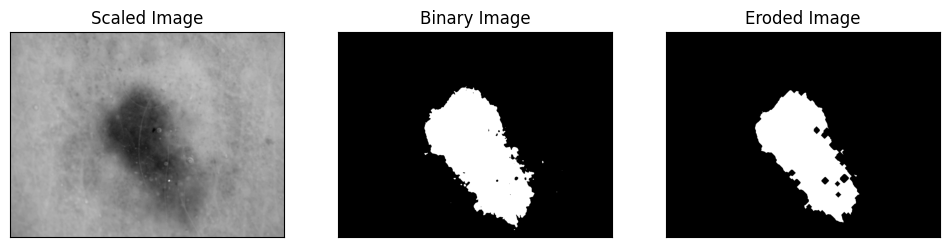

In [330]:
plt.figure(figsize=(12,5))
plt.subplot(131), plt.imshow(scaled_img,cmap='gray')
plt.title('Scaled Image')
plt.xticks([]),plt.yticks([])

plt.subplot(132), plt.imshow(binary,cmap='gray')
plt.title('Binary Image')
plt.xticks([]),plt.yticks([])

plt.subplot(133), plt.imshow(eroded,cmap='gray')
plt.title('Eroded Image')
plt.xticks([]),plt.yticks([])
plt.show()

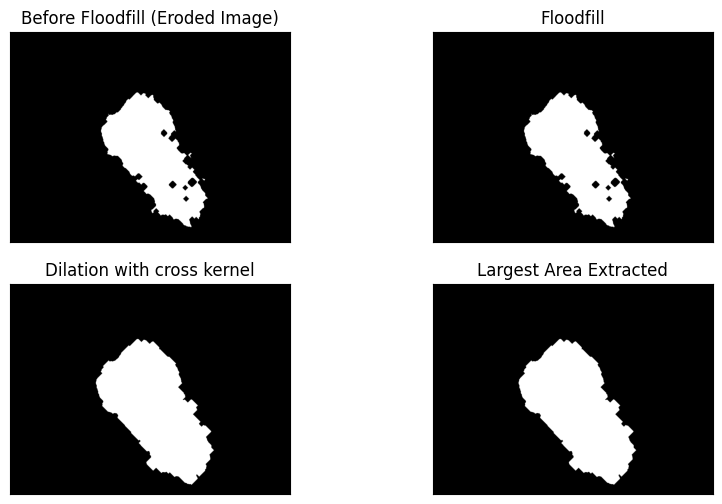

In [331]:
plt.figure(figsize=(10,6))
plt.subplot(221), plt.imshow(eroded,cmap='gray')
plt.title('Before Floodfill (Eroded Image)')
plt.xticks([]),plt.yticks([])

plt.subplot(222), plt.imshow(thresh,cmap='gray')
plt.title('Floodfill')
plt.xticks([]),plt.yticks([])

plt.subplot(223), plt.imshow(dilated,cmap='gray')
plt.title('Dilation with cross kernel')
plt.xticks([]),plt.yticks([])

plt.subplot(224), plt.imshow(lesion_segment,cmap='gray')
plt.title('Largest Area Extracted')
plt.xticks([]),plt.yticks([])
plt.show()

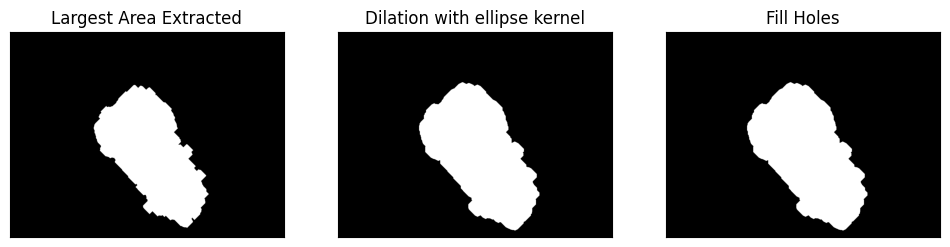

In [332]:
plt.figure(figsize=(12,5))
plt.subplot(131), plt.imshow(lesion_segment,cmap='gray')
plt.title('Largest Area Extracted')
plt.xticks([]),plt.yticks([])

plt.subplot(132), plt.imshow(dilation,cmap='gray')
plt.title('Dilation with ellipse kernel')
plt.xticks([]),plt.yticks([])

plt.subplot(133), plt.imshow(filled_mask,cmap='gray')
plt.title('Fill Holes')
plt.xticks([]),plt.yticks([])
plt.show()